In [ ]:
#Installing Required Libraries:

In [1]:
%%capture
!pip install ibm-watsonx-ai=="0.2.6"
!pip install langchain=="0.1.16" 
!pip install langchain-ibm=="0.1.4"
!pip install langchain-experimental=="0.0.57"
!pip install matplotlib=="3.8.4"
!pip install seaborn=="0.13.2"

In [ ]:
#Importing Libraries

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

from ibm_watsonx_ai.foundation_models import Model
from ibm_watsonx_ai.metanames import GenTextParamsMetaNames as GenParams
from ibm_watson_machine_learning.foundation_models.extensions.langchain import WatsonxLLM

from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Loading The Dataset (student-mat.csv)

In [3]:
df = pd.read_csv(
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/ZNoKMJ9rssJn-QbJ49kOzA/student-mat.csv"
)

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
#Loading The LLM

In [13]:
credentials = {
    "url"    : "https://us-south.ml.cloud.ibm.com"
}


model_id    = 'meta-llama/llama-3-70b-instruct'

params = {
        GenParams.MAX_NEW_TOKENS: 256, 
        GenParams.TEMPERATURE: 0,   
}
project_id  = "skills-network" 
space_id    = None
verify      = False


model = Model(
    model_id=model_id, 
    credentials=credentials, 
    params=params, 
    project_id=project_id, 
    space_id=space_id, 
    verify=verify
)


llm = WatsonxLLM(model = model)

agent = create_pandas_dataframe_agent(
    llm,
    df,
    verbose=False,
    return_intermediate_steps=True 
)

In [ ]:
#Interacting with Data

In [15]:
response = agent.invoke("how many rows of data are in this file?")

In [16]:
response['output']

'395'

In [ ]:
#Checking Model

In [17]:
response['intermediate_steps'][0][0].tool_input.replace('; ', '\n')

'len(df)'

In [20]:
response = agent.invoke("Give me all the data where student's age is over 18 years old.")

print(response)

{'input': "Give me all the data where student's age is over 18 years old.", 'output': 'The final answer is the dataframe with the students who are over 18 years old.', 'intermediate_steps': [(AgentAction(tool='python_repl_ast', tool_input="df[df['age'] > 18]", log="Thought: I need to filter the dataframe to get the rows where the age is greater than 18.\nAction: python_repl_ast\nAction Input: df[df['age'] > 18]"),     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
127     GP   F   19       U     GT3       T     0     1   at_home     other   
153     GP   M   19       U     GT3       T     3     2  services   at_home   
210     GP   F   19       U     GT3       T     3     3     other     other   
247     GP   M   22       U     GT3       T     3     1  services  services   
257     GP   M   19       U     LE3       A     4     3  services   at_home   
270     GP   F   19       U     GT3       T     3     3     other  services   
296     GP   F   19       U  

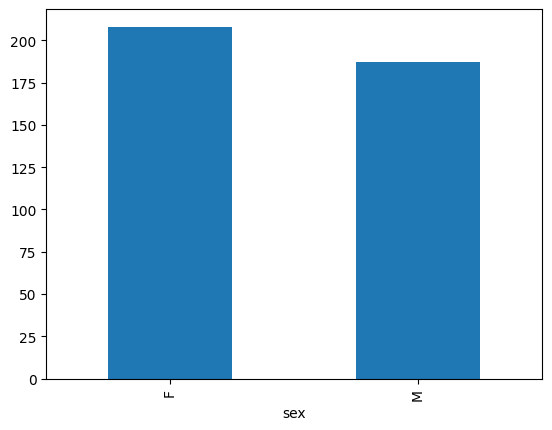

In [21]:
response = agent.invoke("Plot the gender count with bars.")

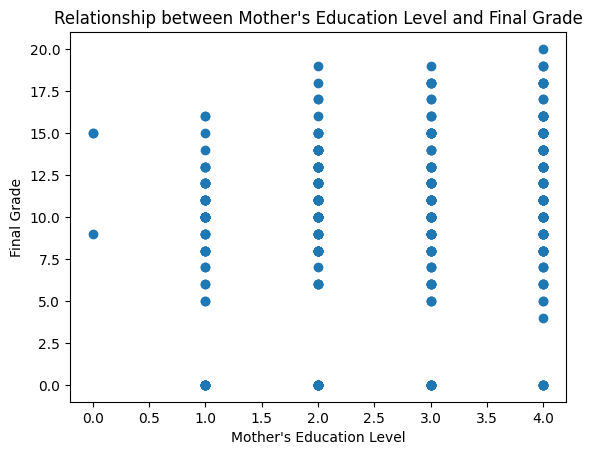

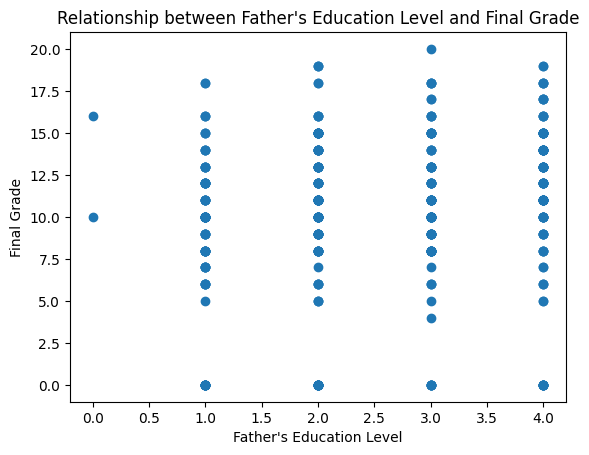

In [22]:
response = agent.invoke("Plot scatter plots to show the relationship between 'Medu' (mother's education level) and 'G3' (final grade), and between 'Fedu' (father's education level) and 'G3'.")

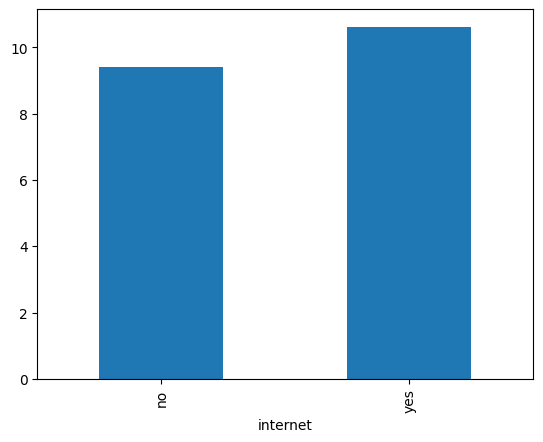

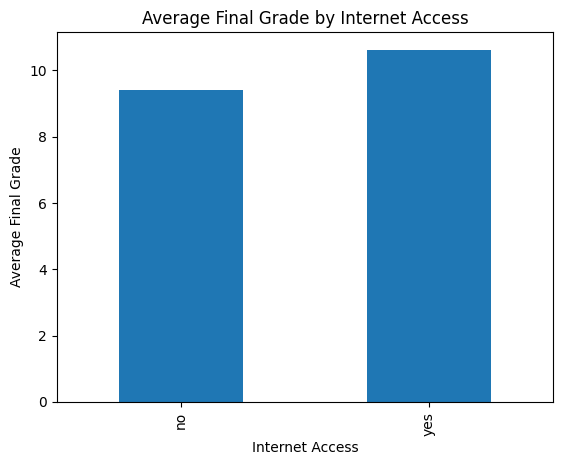

In [23]:
response=agent.invoke(" bar plots to compare the average of final grades ('G3') of students with internet access at home versus those without ('internet' column).")

In [28]:
print(response['intermediate_steps'][0][0].tool_input.replace('; ', '\n'))

import matplotlib.pyplot as plt
plt.plot(df['age'], df['freetime'])
plt.xlabel('Age')
plt.ylabel('Free Time')
plt.title('Age vs Free Time')
plt.show()


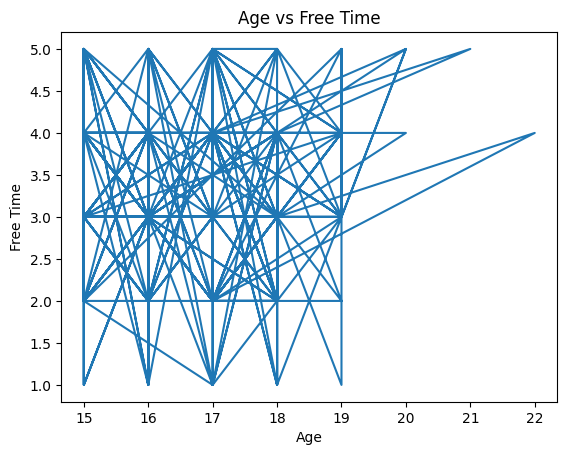

In [27]:
response=agent.invoke("Plot a line graph for age ('age') and freetime ('freetime')")